In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch, torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [113]:
coral=pd.read_csv('/Users/Mehr/Desktop/data/coral_cleaned.csv')
coral=coral.drop('Sample_ID', axis=1)
#coral=coral.set_index('Date_Year')
coral.tail(5)

,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
34510,85.57,3.0,300.97,Atlantic,United States,49.16,Sheltered,0.0586,2005,Population,303.67,0.32,0.21,100.0,300.34,Tropical Atlantic,28.75
34511,85.57,3.0,300.97,Atlantic,United States,49.16,Sheltered,0.0586,2005,Population,303.67,0.32,0.21,100.0,300.34,Tropical Atlantic,5.62
34512,35.71,14.0,301.58,Indian,Madagascar,8768.03,Sometimes,0.0628,2016,Colony,305.32,0.63,0.59,100.0,301.26,Western Indo-Pacific,19.06
34513,58.42,4.0,299.79,Atlantic,United States,8170.00,Exposed,0.1203,2015,Colony,306.04,3.91,3.91,100.0,299.79,Tropical Atlantic,12.50
34514,62.54,4.0,298.32,Atlantic,United States,1863.00,Sheltered,0.1703,2015,Colony,306.82,1.59,-0.57,100.0,299.65,Tropical Atlantic,12.50


I will do a pytorch model on this data to find out about the percent cover(regression)/percent bleaching(regression)/exposed(classification)

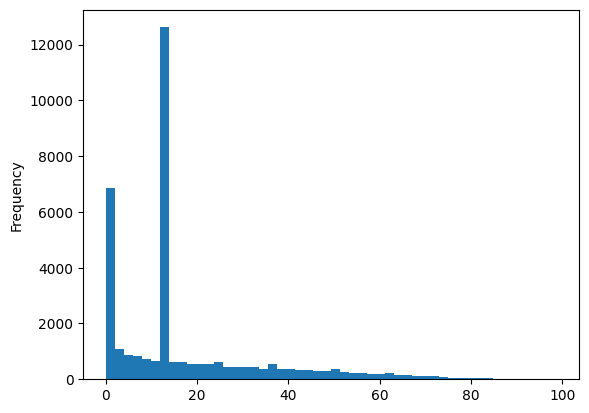

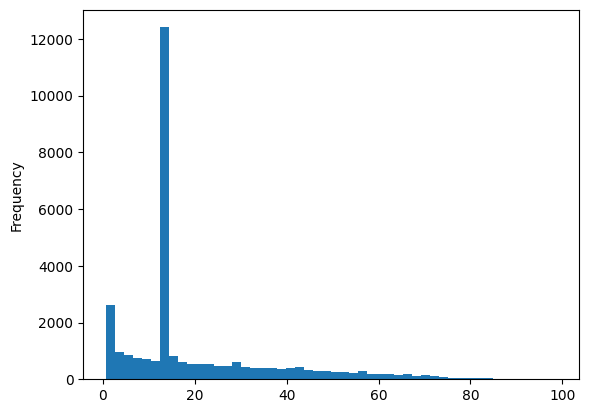

In [138]:
#pd.get_dummies(coral['Coral'], drop_first=True)
coral.sort_index(inplace=True)
coral['Percent_Cover'].plot(kind='hist', bins=50)
plt.show()
coral[coral['Percent_Cover']==0].shape[0]/coral.shape[0]

coral_cleaned=coral[coral['Percent_Cover']!=0]
coral_cleaned.describe()
coral_cleaned['Percent_Cover'].plot(kind='hist', bins=50)
coral_cleaned.reset_index(drop=True, inplace=True)

In [139]:
coral_cleaned.tail()

,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
29866,85.57,3.0,300.97,Atlantic,United States,49.16,Sheltered,0.0586,2005,Population,303.67,0.32,0.21,100.0,300.34,Tropical Atlantic,28.75
29867,85.57,3.0,300.97,Atlantic,United States,49.16,Sheltered,0.0586,2005,Population,303.67,0.32,0.21,100.0,300.34,Tropical Atlantic,5.62
29868,35.71,14.0,301.58,Indian,Madagascar,8768.03,Sometimes,0.0628,2016,Colony,305.32,0.63,0.59,100.0,301.26,Western Indo-Pacific,19.06
29869,58.42,4.0,299.79,Atlantic,United States,8170.00,Exposed,0.1203,2015,Colony,306.04,3.91,3.91,100.0,299.79,Tropical Atlantic,12.50
29870,62.54,4.0,298.32,Atlantic,United States,1863.00,Sheltered,0.1703,2015,Colony,306.82,1.59,-0.57,100.0,299.65,Tropical Atlantic,12.50


In [140]:
get_dummies_columns=["Ocean_Name", "Country_Name", "Exposure", "Bleaching_Level", "Realm_Name"]
#pd.get_dummies(coral_cleaned['Coral'], drop_first=True)
hot_encoder=OneHotEncoder(sparse_output=False)
coral_hoted=hot_encoder.fit_transform(coral_cleaned[get_dummies_columns])

In [141]:
print("Shape of coral_hoted:", coral_hoted.shape)
encoded_feature_names = hot_encoder.get_feature_names_out(get_dummies_columns)

Shape of coral_hoted: (29871, 107)


In [142]:
if coral_hoted.shape[1] == len(encoded_feature_names):
    # Convert the encoded data to a DataFrame
    encoded_df = pd.DataFrame(coral_hoted, columns=encoded_feature_names)
    print(encoded_df.shape)
else:
    print("Mismatch between the shape of encoded data and the number of feature names.")


(29871, 107)


In [143]:
print(coral_cleaned.shape)

(29871, 17)


In [144]:
df_without_get_dummies.tail()

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Percent_Cover
34510,85.57,3.0,300.97,49.16,0.0586,2005,303.67,0.32,0.21,100.0,300.34,28.75
34511,85.57,3.0,300.97,49.16,0.0586,2005,303.67,0.32,0.21,100.0,300.34,5.62
34512,35.71,14.0,301.58,8768.03,0.0628,2016,305.32,0.63,0.59,100.0,301.26,19.06
34513,58.42,4.0,299.79,8170.00,0.1203,2015,306.04,3.91,3.91,100.0,299.79,12.50
34514,62.54,4.0,298.32,1863.00,0.1703,2015,306.82,1.59,-0.57,100.0,299.65,12.50


In [145]:
encoded_df.tail()

,Ocean_Name_Arabian Gulf,Ocean_Name_Atlantic,Ocean_Name_Indian,Ocean_Name_Pacific,Ocean_Name_Red Sea,Country_Name_Antigua and Barbuda,Country_Name_Australia,Country_Name_Bahamas,Country_Name_Bahrain,Country_Name_Bangladesh,...,Bleaching_Level_Colony,Bleaching_Level_Population,Realm_Name_Central Indo-Pacific,Realm_Name_Eastern Indo-Pacific,Realm_Name_Temperate Australasia,Realm_Name_Temperate Northern Atlantic,Realm_Name_Temperate Northern Pacific,Realm_Name_Tropical Atlantic,Realm_Name_Tropical Eastern Pacific,Realm_Name_Western Indo-Pacific
29866,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29868,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29869,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29870,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [146]:
#pd.DataFrame(coral_hoted.toarray(), columns=get_dummies_columns)
df_without_get_dummies = coral_cleaned.drop(columns=get_dummies_columns)
print(df_without_get_dummies.shape)
print(encoded_df.shape)


(29871, 12)
(29871, 107)


In [147]:
df_concatenated=pd.concat([df_without_get_dummies, encoded_df], axis=1)
df_concatenated.shape

(29871, 119)

In [148]:
min_max_scaler=MinMaxScaler()
df=pd.DataFrame(min_max_scaler.fit_transform(df_concatenated), columns=df_concatenated.columns)
df

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,...,Bleaching_Level_Colony,Bleaching_Level_Population,Realm_Name_Central Indo-Pacific,Realm_Name_Eastern Indo-Pacific,Realm_Name_Temperate Australasia,Realm_Name_Temperate Northern Atlantic,Realm_Name_Temperate Northern Pacific,Realm_Name_Tropical Atlantic,Realm_Name_Tropical Eastern Pacific,Realm_Name_Western Indo-Pacific
0,0.361070,0.198807,0.875527,0.028461,0.022343,0.625,0.350500,0.374016,0.625070,0.502,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.375929,0.278330,0.000000,0.004774,0.020397,0.275,0.375096,0.546260,0.742026,0.507,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493885,0.139165,0.812958,0.000599,0.033398,0.650,0.308224,0.423228,0.522104,0.509,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.538119,0.179324,0.843355,0.001036,0.033009,0.650,0.302844,0.412402,0.542809,0.509,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.538119,0.248509,0.843133,0.002636,0.033009,0.650,0.279016,0.419291,0.547286,0.509,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29866,0.768774,0.059642,0.861327,0.000154,0.045621,0.625,0.272098,0.450787,0.681589,1.000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29867,0.768774,0.059642,0.861327,0.000154,0.045621,0.625,0.272098,0.450787,0.681589,1.000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29868,0.198880,0.278330,0.874861,0.029293,0.048891,0.900,0.398924,0.481299,0.702854,1.000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29869,0.458452,0.079523,0.835145,0.027294,0.093655,0.875,0.454266,0.804134,0.888640,1.000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
df=df.reindex(columns=[col for col in df.columns if col != 'Percent_Cover'] + ['Percent_Cover'])

In [149]:
import torch
from torch import nn, optim # Sets of preset layers and optimizers
import torch.nn.functional as F # Sets of functions such as ReLU
from torchvision import datasets, transforms 

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [156]:
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader, Dataset

class CoralDataset(Dataset):
    def __init__(self,data,transform=None):
        self.data=data
        self.target=transform
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        row=self.data.iloc[idx]
        
        feature=row[:-1].values.astype(float)
        target=row[-1]
        if self.transform:
            feature=self.transform(feature)
        
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)


In [160]:
dataloader=DataLoader(CoralDataset(df),batch_size=32,shuffle=True)

torch.utils.data.dataloader.DataLoader